In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

In [76]:
data = pd.read_csv('D:/study docs/Excel R/Data science/assignment/Forecasting/Datasets/Airlines+data.csv')
data.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


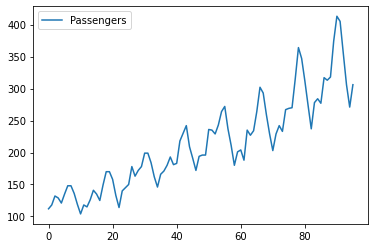

In [77]:
data.plot()
plt.show()

In [78]:
data.shape

(96, 2)

In [79]:
data["Date"] = pd.to_datetime(data.Month,format="%b-%y")
data["month"] = data.Date.dt.strftime("%b") 
data["year"] = data.Date.dt.strftime("%Y")

In [80]:
data.head()

,Month,Passengers,Date,month,year
0,Jan-95,112,1995-01-01,Jan,1995
1,Feb-95,118,1995-02-01,Feb,1995
2,Mar-95,132,1995-03-01,Mar,1995
3,Apr-95,129,1995-04-01,Apr,1995
4,May-95,121,1995-05-01,May,1995


In [81]:
data1 = data.set_index(['Date'])

In [82]:
data2 = pd.get_dummies(columns = ['month'], data = data1)

In [83]:
data3 = data2.rename({'month_Jan':'Jan','month_Feb':'Feb','month_Mar':'Mar','month_Apr':'Apr','month_May':'May','month_Jun':'Jun',
                      'month_Jul':'Jul','month_Aug':'Aug','month_Sep':'Sep','month_Oct':'Oct','month_Nov':'Nov','month_Dec':'Dec'},axis = 1)

In [84]:
t= np.arange(1,97)
data3['t']=t
data3['t_square']=data3['t']*data3['t']
log_Sales=np.log(data3['Passengers'])
data3['log_Passengers']=log_Sales

In [85]:
data3.head()

,Month,Passengers,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
Date,,,,,,,,,,,,,,,,,,
1995-01-01,Jan-95,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1995-02-01,Feb-95,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
1995-03-01,Mar-95,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
1995-04-01,Apr-95,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
1995-05-01,May-95,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


<AxesSubplot:xlabel='year', ylabel='Passengers'>

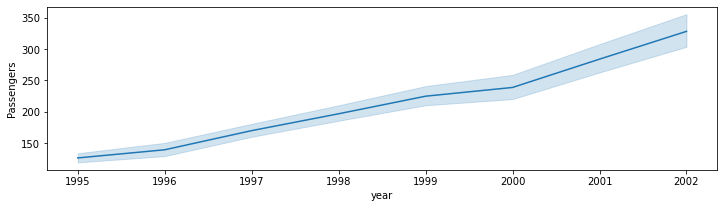

In [86]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data3)

In [87]:
data3.shape

(96, 18)

In [88]:
Train = data3.head(80)
Test = data3.tail(16)

In [89]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.542624067726734

In [90]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334322

In [91]:
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.6544036958425

In [92]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.26647641443307

In [93]:
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

23.910983570106755

In [94]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621102

In [95]:
Mul_Add_sea = smf.ols('log_Passengers ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

9.469000230304077

In [96]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,9.469000
4,rmse_add_sea_quad,23.910984
2,rmse_Quad,43.654404
1,rmse_Exp,43.793739
0,rmse_linear,47.542624
3,rmse_add_sea,129.266476
5,rmse_Mult_sea,135.326484


In [97]:
model = smf.ols('log_Passengers ~ t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = data3).fit()

In [98]:
pred_new  = pd.Series(model.predict(data3))
pred_new

Date
1995-01-01    4.692963
1995-02-01    4.703487
1995-03-01    4.846666
1995-04-01    4.813814
1995-05-01    4.807291
                ...   
2002-08-01    5.978339
2002-09-01    5.868100
2002-10-01    5.737989
2002-11-01    5.607538
2002-12-01    5.744085
Length: 96, dtype: float64

In [99]:
actual_pred = np.exp(pred_new)

In [100]:
actual_pred

Date
1995-01-01    109.176148
1995-02-01    110.331245
1995-03-01    127.315234
1995-04-01    123.200587
1995-05-01    122.399578
                 ...    
2002-08-01    394.784174
2002-09-01    353.576683
2002-10-01    310.439400
2002-11-01    272.472660
2002-12-01    312.337712
Length: 96, dtype: float64

In [101]:
data3["forecasted_Passengers"] = pd.Series(actual_pred)

In [102]:
data3

,Month,Passengers,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers,forecasted_Passengers
Date,,,,,,,,,,,,,,,,,,,
1995-01-01,Jan-95,112,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499,109.176148
1995-02-01,Feb-95,118,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685,110.331245
1995-03-01,Mar-95,132,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802,127.315234
1995-04-01,Apr-95,129,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812,123.200587
1995-05-01,May-95,121,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791,122.399578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002-08-01,Aug-02,405,2002,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887,394.784174
2002-09-01,Sep-02,355,2002,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118,353.576683
2002-10-01,Oct-02,306,2002,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585,310.439400


In [103]:
arima_data = pd.read_csv('D:/study docs/Excel R/Data science/assignment/Forecasting/Datasets/Airlines+data.csv')
arima_data.head()

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121


In [104]:
arima_data["Date"] = pd.to_datetime(arima_data.Month,format="%b-%y")

In [105]:
arima_data.head()

,Month,Passengers,Date
0,Jan-95,112,1995-01-01
1,Feb-95,118,1995-02-01
2,Mar-95,132,1995-03-01
3,Apr-95,129,1995-04-01
4,May-95,121,1995-05-01


In [106]:
arima_data1 = arima_data.drop(['Month'],axis =1)
arima_data2 = arima_data1.set_index(['Date'])

In [107]:
arima_data2.head()

,Passengers
Date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


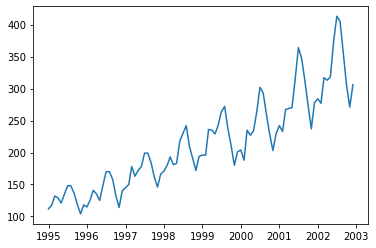

In [108]:
plt.plot(arima_data2)

In [109]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

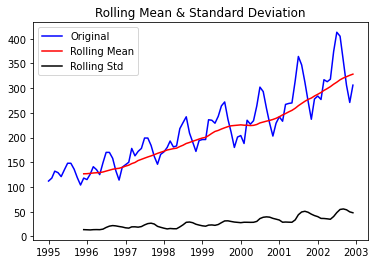

Results of Dickey Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [110]:
test_stationarity(arima_data2)

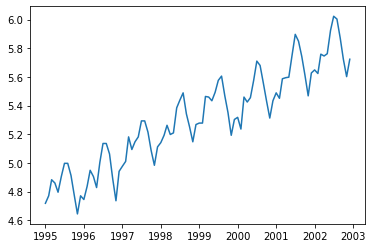

In [111]:
log_data = np.log(arima_data2)
plt.plot(log_data)

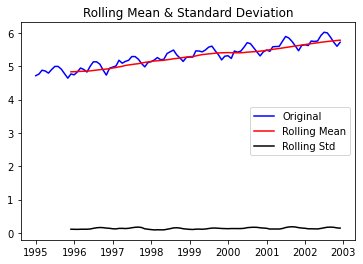

Results of Dickey Fuller Test:
Test Statistic                 -0.723027
p-value                         0.840695
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


In [112]:
test_stationarity(log_data)

In [113]:
log_movingAverage = log_data.rolling(window=12).mean()

In [114]:
datasetLogScaleMinusMovingAverage = log_data - log_movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Passengers
Date,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142
1996-05-01,-0.027529
1996-06-01,0.139881
1996-07-01,0.260184
1996-08-01,0.248635


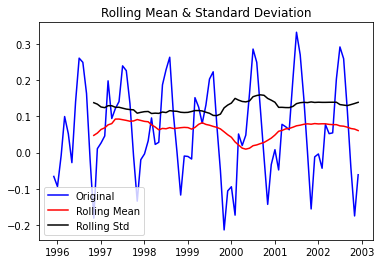

Results of Dickey Fuller Test:
Test Statistic                 -1.910930
p-value                         0.326937
#Lags Used                     12.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


In [115]:
test_stationarity(datasetLogScaleMinusMovingAverage)

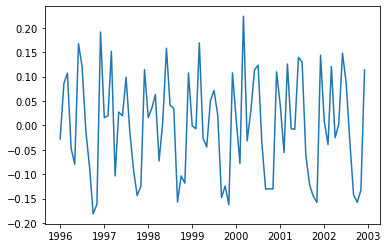

In [116]:
datasetLogDiffShifting = datasetLogScaleMinusMovingAverage - datasetLogScaleMinusMovingAverage.shift()
plt.plot(datasetLogDiffShifting)

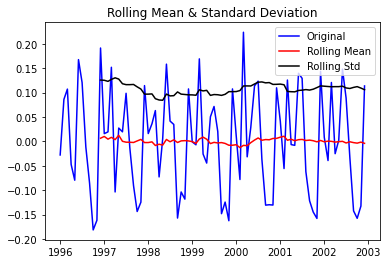

Results of Dickey Fuller Test:
Test Statistic                 -2.619533
p-value                         0.089027
#Lags Used                     12.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64


In [117]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

C:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


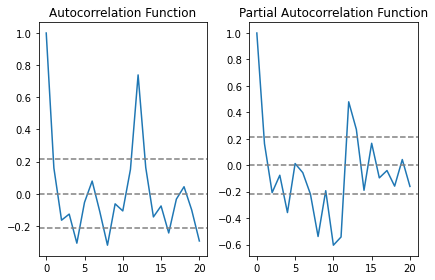

In [118]:
lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

C:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.war

Plotting AR model


C:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


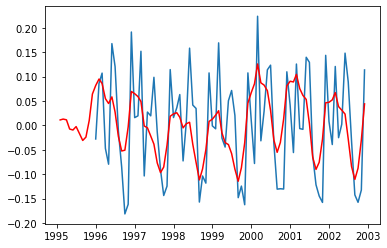

In [119]:
model = ARIMA(log_data, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
print('Plotting AR model')